In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mplcursors


# Question
What are the main sources of fossil fuels used in Europe and how have these changed since the 2000s?
1. Which countries are the largest suppliers of oil, natural gas, and coal to Europe
2. How has Europe’s reliance on imported fossil fuels evolved in recent years, particularly with the impact of the Russian invasion of Ukraine on energy imports? Is a trend visible in the data?

## Approach
To understand the sources of fossil fuels, 3 aspects are taken into account:
1. Total energy consumption
2. Import statistics
3. Domestic production

### To further analyze any significant import patterns, 
- top 10 countries that are the major import partners over time are selected

## Datasets

1. Energy consumption by Source:
https://ourworldindata.org/grapher/energy-consumption-by-source-and-country?time=2000..latest&facet=metric&country=~OWID_EUR

2. Import statistics from other parts of world:

3. Domestic production of energy by fossil fuels:

In [2]:
# Energy Consumption
energy_consumption_data = '../data/Data_Question_5/europe-energy-consumption-by-source/energy-consumption.csv'
data_energy = pd.read_csv(energy_consumption_data)

# Import Statistics
# import_statistics = '../data/Data_Question_5/.../.csv'
# data_import = pd.read_csv(import_statistics)

# # Domestic Energy Production
# domestic_energy_data = '../data/Data_Question_5/.csv'
# data_domestic = pd.read_csv(domestic_energy_data)



## Data preprocessing for Energy Consumption data

In [3]:
data_energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 21 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   Entity                                                       24 non-null     object 
 1   Code                                                         0 non-null      float64
 2   Year                                                         24 non-null     int64  
 3   Other renewables (including geothermal and biomass) - TWh    24 non-null     float64
 4   Biofuels consumption - TWh                                   24 non-null     float64
 5   Solar consumption - TWh                                      24 non-null     float64
 6   Wind consumption - TWh                                       24 non-null     float64
 7   Hydro consumption - TWh                                      24 non-null     float

In [4]:
data_energy = data_energy.drop(data_energy.columns[[0, 1, 12, 13, 14, 15, 16, 17, 18, 19, 20]], axis = 1, inplace=False)

In [5]:
data_energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 10 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   Year                                                       24 non-null     int64  
 1   Other renewables (including geothermal and biomass) - TWh  24 non-null     float64
 2   Biofuels consumption - TWh                                 24 non-null     float64
 3   Solar consumption - TWh                                    24 non-null     float64
 4   Wind consumption - TWh                                     24 non-null     float64
 5   Hydro consumption - TWh                                    24 non-null     float64
 6   Nuclear consumption - TWh                                  24 non-null     float64
 7   Gas consumption - TWh                                      24 non-null     float64
 8   Coal consump

# Overview of sources of fossil fuels contributing in energy consumption in Europe

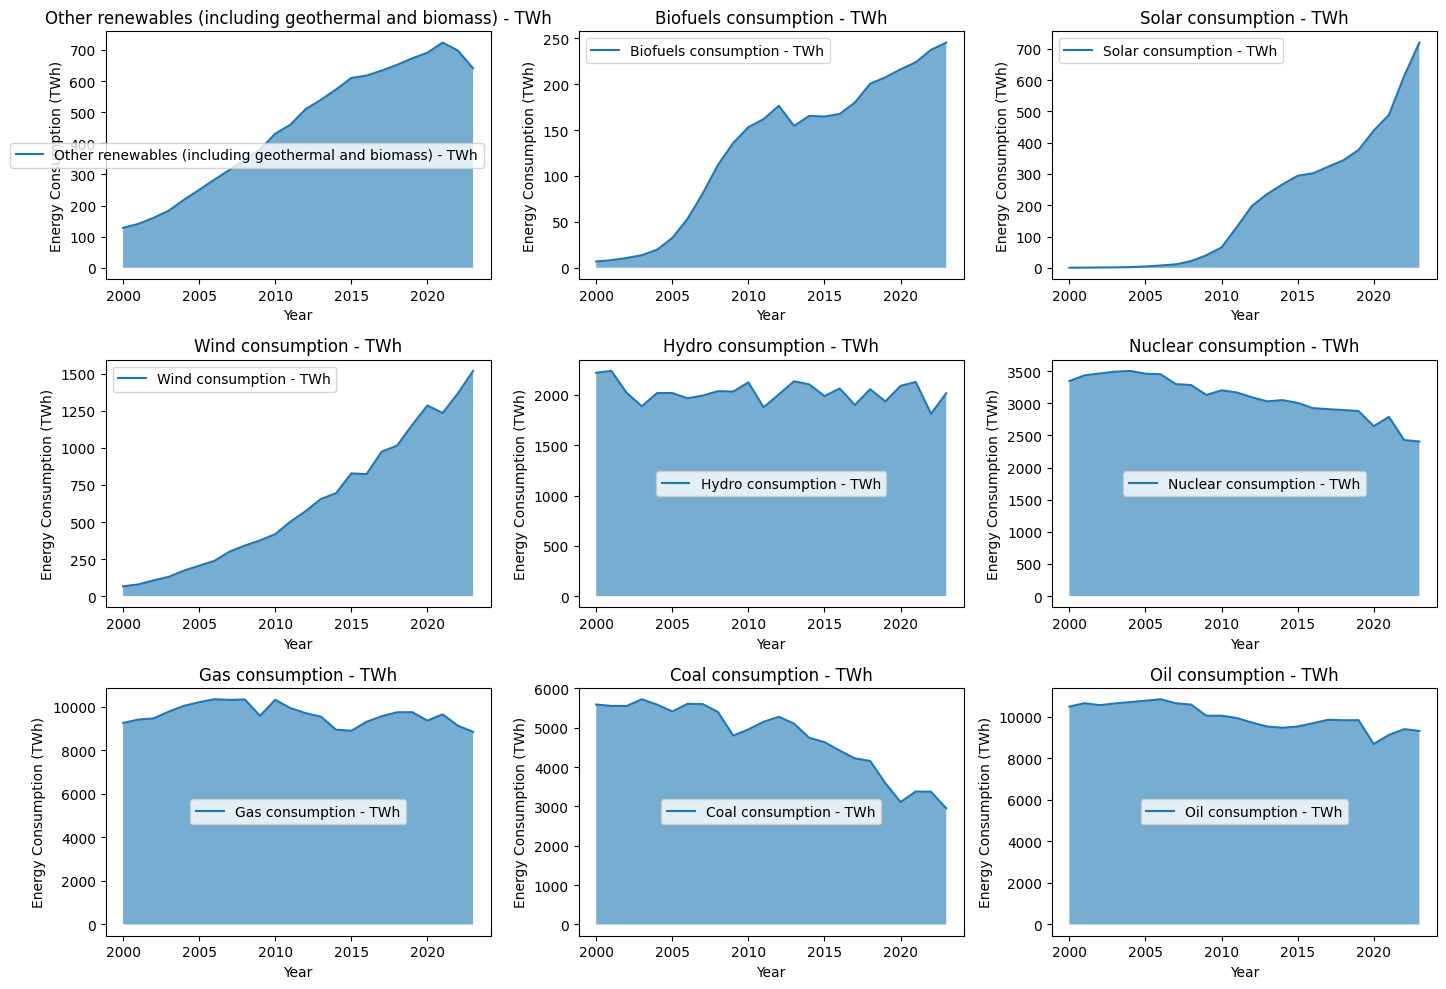

In [6]:
# List of energy sources columns to visualize
energy_sources = [
    "Other renewables (including geothermal and biomass) - TWh",
    "Biofuels consumption - TWh",
    "Solar consumption - TWh",
    "Wind consumption - TWh",
    "Hydro consumption - TWh",
    "Nuclear consumption - TWh",
    "Gas consumption - TWh",
    "Coal consumption - TWh",
    "Oil consumption - TWh"
]

# Create subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

# Flatten the 2D axes array for easier indexing
axes = axes.flatten()

# Loop over energy sources to create a line plot for each
for i, energy_source in enumerate(energy_sources):
    axes[i].plot(data_energy['Year'], data_energy[energy_source], label=energy_source)
    axes[i].fill_between(data_energy['Year'], data_energy[energy_source], alpha=0.6)
    axes[i].set_title(energy_source)
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Energy Consumption (TWh)')
    axes[i].legend()

plt.tight_layout()
plt.show()